In [1]:

import numpy as np   
from sklearn.cluster import KMeans
import pandas as pd    
import matplotlib.pyplot as plt   
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Design a synthetic data generation model which can impute values [Attribute: Quality] wherever empty the company
## has missed recording the data

In [2]:
df=pd.read_excel("C:/Users/HP/Downloads/Company.xlsx")

In [3]:
df

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A
...,...,...,...,...,...
56,200,186,185,179,Quality B
57,137,182,165,199,NaN
58,88,39,9,102,NaN
59,180,157,192,198,NaN


In [4]:
df.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

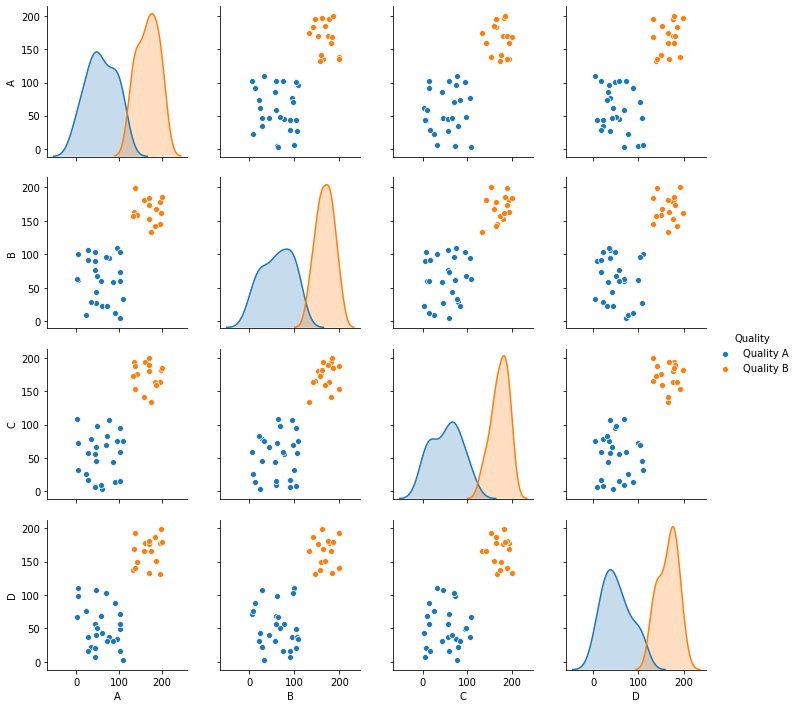

In [5]:
sns.pairplot(df, diag_kind='kde', hue = 'Quality')  

In [6]:
X=df.drop('Quality',axis=1)

In [7]:
from sklearn.cluster import KMeans
from scipy.spatial import distance

# Let us check optimal number of clusters-
distortion = []

cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  distortion.append(sum(np.min(distance.cdist(X, clusters.cluster_centers_, 'euclidean'), axis=1))/ X.shape[0])
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,927628.852459
1,2,172153.266234
2,3,144500.170629
3,4,123442.587662
4,5,111963.681579
5,6,97582.461905
6,7,85396.206410
7,8,72080.729365
8,9,70705.946032


In [8]:
cluster = KMeans( n_clusters = 2, random_state = 2354 )
cluster.fit(df.drop('Quality',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

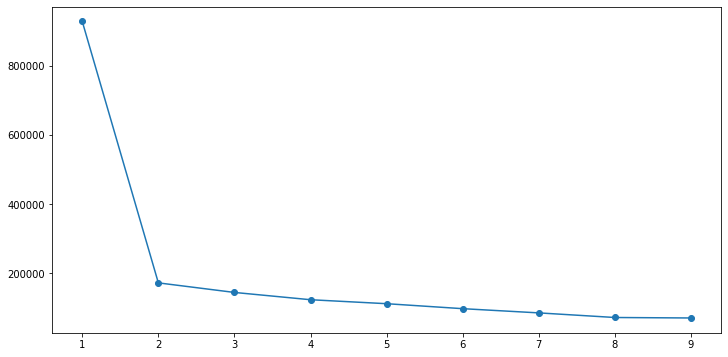

In [9]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

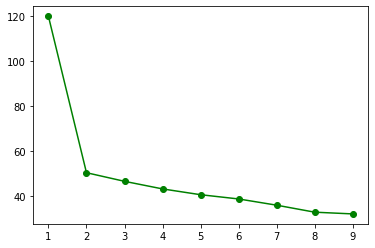

In [10]:
plt.plot(range(1,10), distortion, 'go-')

In [11]:
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(X)


In [12]:
prediction= kmeans.predict(X)  

df["group"] = prediction  

In [13]:
df

,A,B,C,D,Quality,group
0,47,27,45,108,Quality A,1
1,174,133,134,166,Quality B,0
2,159,163,135,131,NaN,0
3,61,23,3,44,Quality A,1
4,59,60,9,68,Quality A,1
...,...,...,...,...,...,...
56,200,186,185,179,Quality B,0
57,137,182,165,199,NaN,0
58,88,39,9,102,NaN,1
59,180,157,192,198,NaN,0


In [14]:
df[df.isnull().any(axis=1)]

,A,B,C,D,Quality,group
2,159,163,135,131,NaN,0
5,153,140,154,199,NaN,0
7,191,144,143,154,NaN,0
9,145,178,158,141,NaN,0
14,186,142,146,174,NaN,0
18,167,171,163,191,NaN,0
23,171,185,181,183,NaN,0
27,193,169,199,155,NaN,0
29,29,49,6,35,NaN,1
32,161,138,143,139,NaN,0


In [15]:
def QualityPrediction(col):
    if (col==1):
        return "Quality A"
    else:
        return "Quality B"


df['Quality']=df['group'].apply(QualityPrediction)

In [16]:
df

,A,B,C,D,Quality,group
0,47,27,45,108,Quality A,1
1,174,133,134,166,Quality B,0
2,159,163,135,131,Quality B,0
3,61,23,3,44,Quality A,1
4,59,60,9,68,Quality A,1
...,...,...,...,...,...,...
56,200,186,185,179,Quality B,0
57,137,182,165,199,Quality B,0
58,88,39,9,102,Quality A,1
59,180,157,192,198,Quality B,0


In [17]:
df[df.isnull().any(axis=1)]

,A,B,C,D,Quality,group
